In [2]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
from torchvision.models import resnet18, ResNet18_Weights


In [4]:
# Define dataset path
dataset_path = "dataset"

# Image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),   # Resize images
    transforms.ToTensor(),           # Convert to tensor
    transforms.Normalize([0.5], [0.5])  # Normalize
])

# Load datasets
train_dataset = datasets.ImageFolder(root=os.path.join(dataset_path, r"DATASET\TRAIN"), transform=transform)
test_dataset = datasets.ImageFolder(root=os.path.join(dataset_path, r"DATASET\TEST"), transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Print class names
class_names = train_dataset.classes
print("Classes:", class_names)


Classes: ['O', 'R']


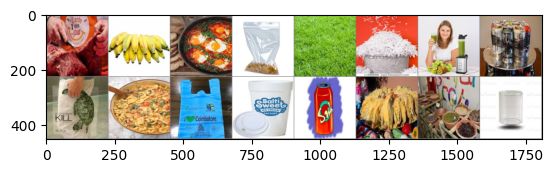

O O O R


In [5]:
# Function to display images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))
print(" ".join(f"{class_names[labels[j]]}" for j in range(4)))


In [5]:
# Load a pre-trained ResNet18 model
weights = ResNet18_Weights.DEFAULT
model = resnet18(weights=weights)

# Modify the final layer to match the number of classes
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(class_names))

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

print("Model is ready and moved to:", device)


Model is ready and moved to: cuda


In [6]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [7]:
# Training function
def train_model(model, train_loader, criterion, optimizer, epochs=20):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100 * correct / total:.2f}%")

# Train the model for 10 epochs
train_model(model, train_loader, criterion, optimizer, epochs=20)


Epoch 1/20, Loss: 0.3449, Accuracy: 86.23%
Epoch 2/20, Loss: 0.2832, Accuracy: 89.03%
Epoch 3/20, Loss: 0.2514, Accuracy: 90.33%
Epoch 4/20, Loss: 0.2322, Accuracy: 91.20%
Epoch 5/20, Loss: 0.2134, Accuracy: 91.82%
Epoch 6/20, Loss: 0.1906, Accuracy: 92.65%
Epoch 7/20, Loss: 0.1578, Accuracy: 93.96%
Epoch 8/20, Loss: 0.1388, Accuracy: 94.73%
Epoch 9/20, Loss: 0.1058, Accuracy: 96.09%
Epoch 10/20, Loss: 0.0910, Accuracy: 96.48%
Epoch 11/20, Loss: 0.0681, Accuracy: 97.46%
Epoch 12/20, Loss: 0.0614, Accuracy: 97.82%
Epoch 13/20, Loss: 0.0456, Accuracy: 98.36%
Epoch 14/20, Loss: 0.0451, Accuracy: 98.40%
Epoch 15/20, Loss: 0.0380, Accuracy: 98.67%
Epoch 16/20, Loss: 0.0445, Accuracy: 98.42%
Epoch 17/20, Loss: 0.0370, Accuracy: 98.71%
Epoch 18/20, Loss: 0.0333, Accuracy: 98.85%
Epoch 19/20, Loss: 0.0363, Accuracy: 98.66%
Epoch 20/20, Loss: 0.0238, Accuracy: 99.14%


In [8]:
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    print(f"Test Accuracy: {100 * correct / total:.2f}%")

# Evaluate the model
evaluate_model(model, test_loader)


Test Accuracy: 90.21%


In [7]:
# Save trained model
torch.save(model.state_dict(), "waste_classification_model.pth")
print("Model saved successfully!")


NameError: name 'model' is not defined

In [10]:
# Load the trained model
model.load_state_dict(torch.load("waste_classification_model.pth"))
model.eval()
print("Model loaded successfully!")


Model loaded successfully!


In [1]:
def predict_image(image_path, model):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])
    ])
    
    image = Image.open(image_path)
    image = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(image)
        _, predicted = output.max(1)
    
    print(f"Predicted class: {class_names[predicted.item()]}")

# Predict on a sample image
predict_image(r"E:\Working Directory\Jupyter notebook\dataSet\DATASET\DATASET\TEST\R\R_10595.jpg", model)


NameError: name 'model' is not defined